# Correlated Brownian Motion Simulation

## Theory

Brownian motion, also known as Wiener process, is a continuous-time stochastic process named after botanist Robert Brown. It's fundamental in various fields, including physics, mathematics, and finance. In financial mathematics, Brownian motion is often used to model stock prices and other financial instruments.

A standard Brownian motion $W(t)$ has the following properties:
1. $W(0) = 0$
2. For $0 \leq s < t$, the increment $W(t) - W(s)$ is normally distributed with mean 0 and variance $t - s$
3. For non-overlapping time intervals, the increments are independent

Correlated Brownian motion extends this concept to multiple dimensions, where the movements of two or more Brownian paths are related by a correlation coefficient.

## Formulas

The key formula used in this code is for generating correlated Brownian motions:

Given two independent standard Brownian motions $Z_1$ and $Z_2$, we can create correlated Brownian motions $W_1$ and $W_2$ with correlation $\rho$ as follows:

$W_1 = Z_1$
$W_2 = \rho Z_1 + \sqrt{1 - \rho^2} Z_2$

The discretized version for simulation is:

$\Delta W_1 = \sqrt{\Delta t} Z_1$
$\Delta W_2 = \rho \sqrt{\Delta t} Z_1 + \sqrt{1 - \rho^2} \sqrt{\Delta t} Z_2$

Where $Z_1$ and $Z_2$ are independent standard normal random variables, and $\Delta t$ is the time step.

## Code Explanation

The code simulates correlated Brownian motions and visualizes them for different correlation coefficients. Here's a step-by-step explanation:

1. **Function `generateoathscorrelatedBM`**:
   - Generates correlated Brownian motion paths
   - Inputs: number of paths, number of steps, total time, and correlation coefficient
   - Outputs: dictionary containing time grid and Brownian motion paths

2. **Function `mainCalculation`**:
   - Sets up parameters: 1 path, 500 steps, total time of 1.0
   - Simulates and plots correlated Brownian motions for three scenarios:
     a. Negative correlation ($\rho = -0.9$)
     b. Positive correlation ($\rho = 0.9$)
     c. Zero correlation ($\rho = 0.0$)

3. **Simulation Process**:
   - Generate independent standard normal random variables
   - Apply the correlation formula to create correlated increments
   - Accumulate increments to form Brownian motion paths

4. **Visualization**:
   - Plot the two correlated Brownian motion paths on the same graph
   - Create separate plots for each correlation scenario

This simulation demonstrates how the correlation coefficient affects the relationship between two Brownian motion paths, from moving in opposite directions (negative correlation) to moving together (positive correlation), with independent movement at zero correlation.

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt 



In [17]:
def generateoathscorrelatedBM(noofpath,noofsteps,T,rho):
    Z1=np.random.normal(0.0,1.0,[noofpath,noofsteps])
    Z2=np.random.normal(0.0,1.0,[noofpath,noofsteps])
    W1=np.zeros([noofpath,noofsteps+1])
    W2=np.zeros([noofpath,noofsteps+1])
    dt=T/ float(noofsteps)
    time=np.zeros([noofsteps+1])
    for i in range(0,noofsteps):
        if noofpath>1:
            Z1[:,i]=(Z1[:,i]-np.mean(Z1[:,i]))/np.std(Z1[:,i])
            Z2[:,i]=(Z2[:,i]-np.mean(Z2[:,i]))/np.std(Z2[:,i])
        # correation calcularation and implimentaion
        Z2[:,i]=rho*Z1[:,i]+np.sqrt(1.0-rho**2)*Z2[:,i]
        W1[:,i+1]=W1[:,i]+ np.power(dt, 0.5) * Z1[:,i]
        W2[:,i+1] = W2[:,i] + np.power(dt, 0.5) * Z2[:,i]
        time[i+1] = time[i] + dt
        paths = {"time":time,"W1":W1,"W2":W2}
    return paths

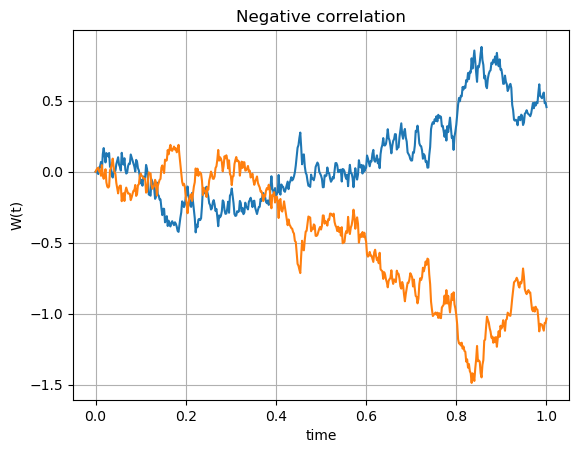

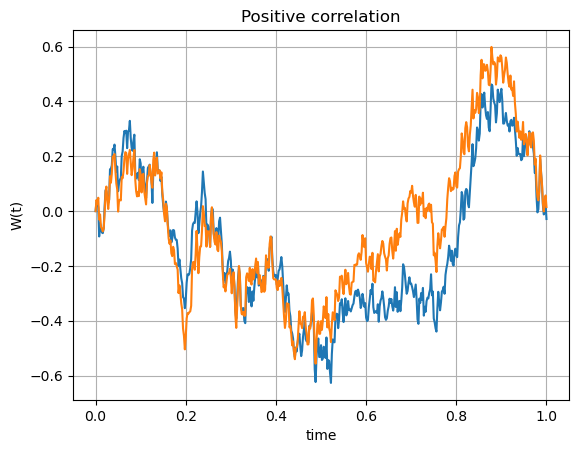

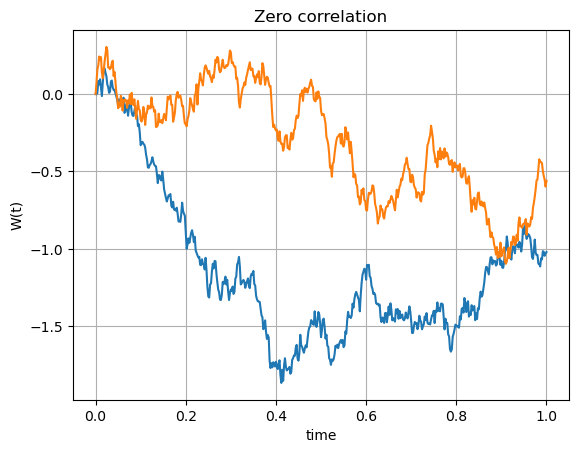

In [18]:
def mainCalculation():
    NoOfPaths = 1
    NoOfSteps = 500
    T = 1.0
    
    ############### Negative correlation ######################
    rho =-0.9
    Paths = generateoathscorrelatedBM(NoOfPaths,NoOfSteps,T,rho)
    
    timeGrid = Paths["time"]
    W1 = Paths["W1"]
    W2 = Paths["W2"]
    
    plt.figure(1)
    plt.title('Negative correlation')
    plt.plot(timeGrid, W1.T)   
    plt.plot(timeGrid, W2.T)   
    plt.grid()
    plt.xlabel("time")
    plt.ylabel("W(t)")
    
    ############### Positive correlation ######################
    rho =0.9
    Paths = generateoathscorrelatedBM(NoOfPaths,NoOfSteps,T,rho)
    timeGrid = Paths["time"]
    W1 = Paths["W1"]
    W2 = Paths["W2"]
    
    plt.figure(2)
    plt.title('Positive correlation')
    plt.plot(timeGrid, np.transpose(W1))   
    plt.plot(timeGrid, np.transpose(W2))   
    plt.grid()
    plt.xlabel("time")
    plt.ylabel("W(t)")
    
    ############### Zero correlation ######################
    rho =0.0
    Paths = generateoathscorrelatedBM(NoOfPaths,NoOfSteps,T,rho)
    timeGrid = Paths["time"]
    W1 = Paths["W1"]
    W2 = Paths["W2"]
    
    plt.figure(3)
    plt.title('Zero correlation')
    plt.plot(timeGrid, np.transpose(W1))   
    plt.plot(timeGrid, np.transpose(W2))   
    plt.grid()
    plt.xlabel("time")
    plt.ylabel("W(t)")
mainCalculation()